In [30]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(15, 9)})
sns.set(font_scale=1.5) 

from prophet import Prophet

In [31]:
df_storage = pd.read_excel (r'C:\Users\39392\Desktop\Data Analytics\git\Prediction Model\data\ng-storage.xls')
df_storage.head()

,Date,Weekly Lower 48 States Natural Gas Working Underground Storage (Billion Cubic Feet)
0,2010-01-01,3117
1,2010-01-08,2850
2,2010-01-15,2607
3,2010-01-22,2521
4,2010-01-29,2406


In [32]:
df_storage.rename(columns = {'Weekly Lower 48 States Natural Gas Working Underground Storage (Billion Cubic Feet)':'storage_bcf'}, inplace = True)
df_storage.head()

,Date,storage_bcf
0,2010-01-01,3117
1,2010-01-08,2850
2,2010-01-15,2607
3,2010-01-22,2521
4,2010-01-29,2406


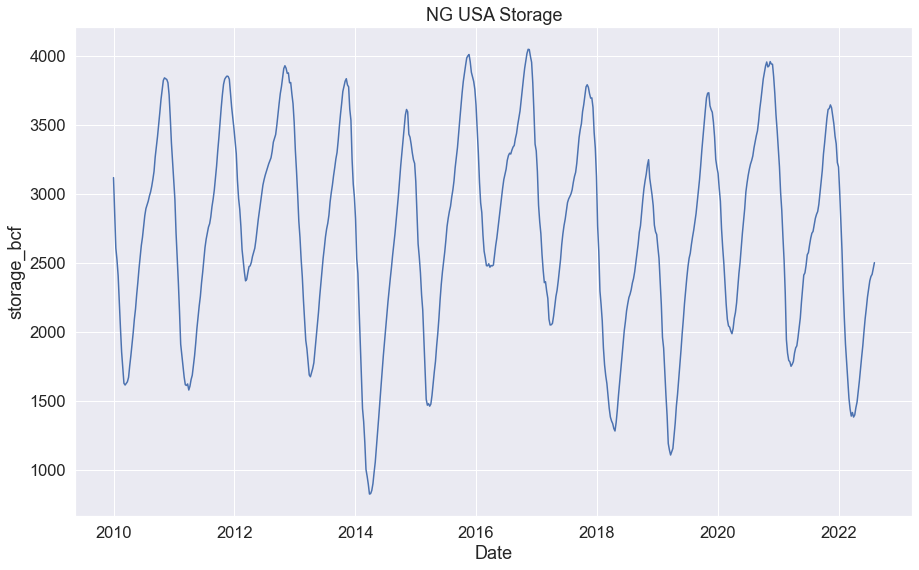

In [33]:
graph = sns.lineplot(x='Date', y='storage_bcf', data=df_storage)
graph.set_title('NG USA Storage')
plt.show()

In [34]:
df_storage['year'] = df_storage['Date'].dt.year
df_storage['month'] = df_storage['Date'].dt.month
df_storage.head()

,Date,storage_bcf,year,month
0,2010-01-01,3117,2010,1
1,2010-01-08,2850,2010,1
2,2010-01-15,2607,2010,1
3,2010-01-22,2521,2010,1
4,2010-01-29,2406,2010,1


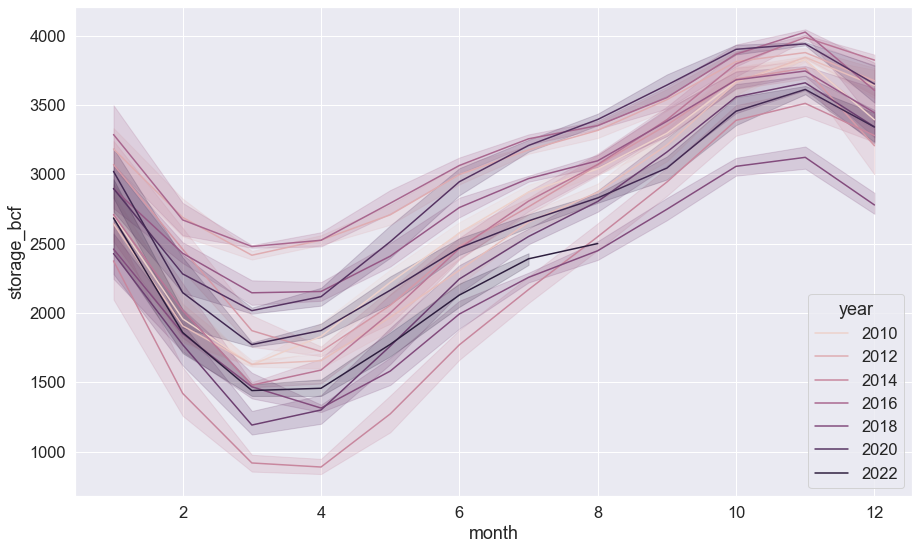

In [35]:
sns.lineplot(x='month', y='storage_bcf', hue='year', data=df_storage)
plt.show()

In [36]:
# Select Date and storage
df = df_storage[["Date","storage_bcf"]] 
# Rename the features: These names are required for the model fitting
df = df_storage.rename(columns = {"Date":"ds","storage_bcf":"y"}) 
df.head()


,ds,y,year,month
0,2010-01-01,3117,2010,1
1,2010-01-08,2850,2010,1
2,2010-01-15,2607,2010,1
3,2010-01-22,2521,2010,1
4,2010-01-29,2406,2010,1


In [45]:
train = df[df.ds<'2022-01-01']
test = df[df.ds>='2022-01-01']

In [46]:
m = Prophet(seasonality_mode='additive')
m.fit(df)

17:06:06 - cmdstanpy - INFO - Chain [1] start processing
17:06:07 - cmdstanpy - INFO - Chain [1] done processing


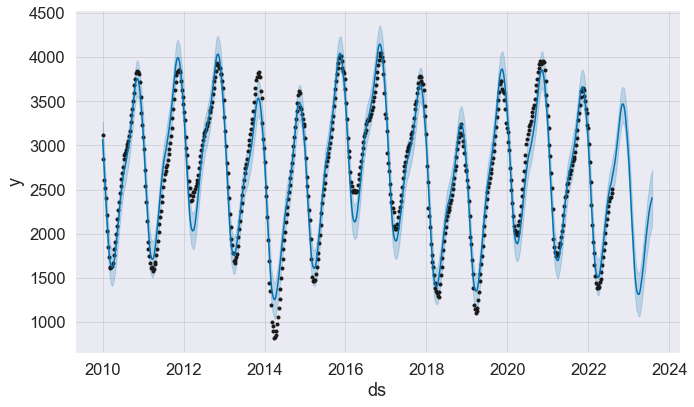

In [47]:
future = m.make_future_dataframe(52, freq='W')
forecast = m.predict(future)
fig = m.plot(forecast)

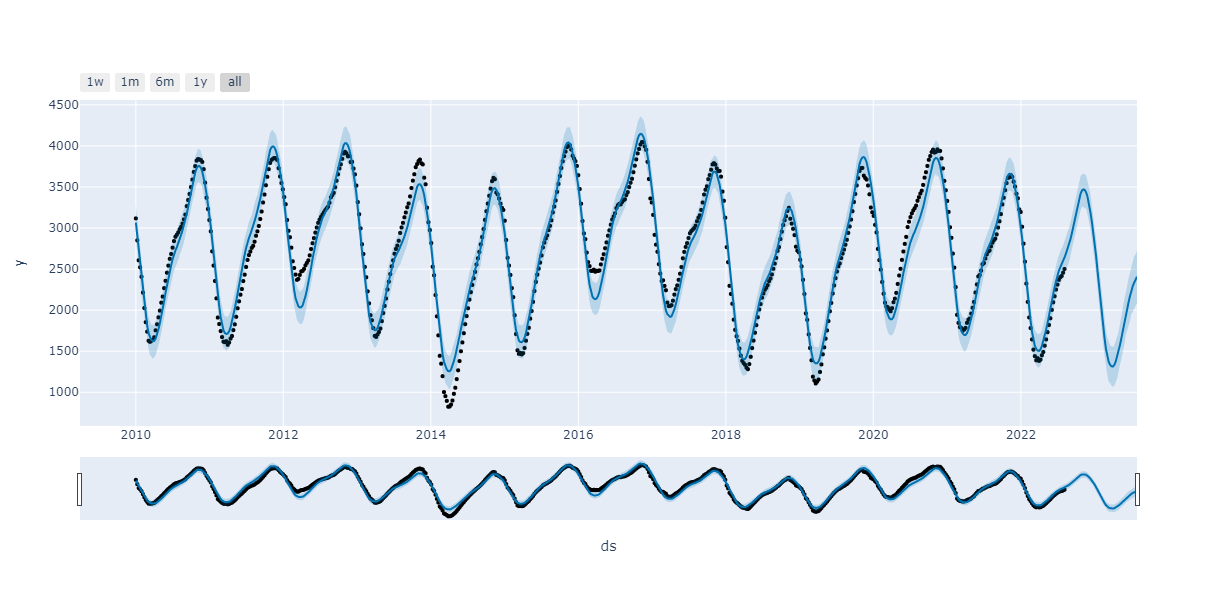

In [48]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)

In [49]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
705,2023-07-02,2236.405771,1940.333482,2558.420138
706,2023-07-09,2292.781279,1994.197280,2610.820106
707,2023-07-16,2334.305506,2038.498081,2636.962114
708,2023-07-23,2368.634973,2040.757406,2679.126721
709,2023-07-30,2406.705410,2092.120510,2749.458817


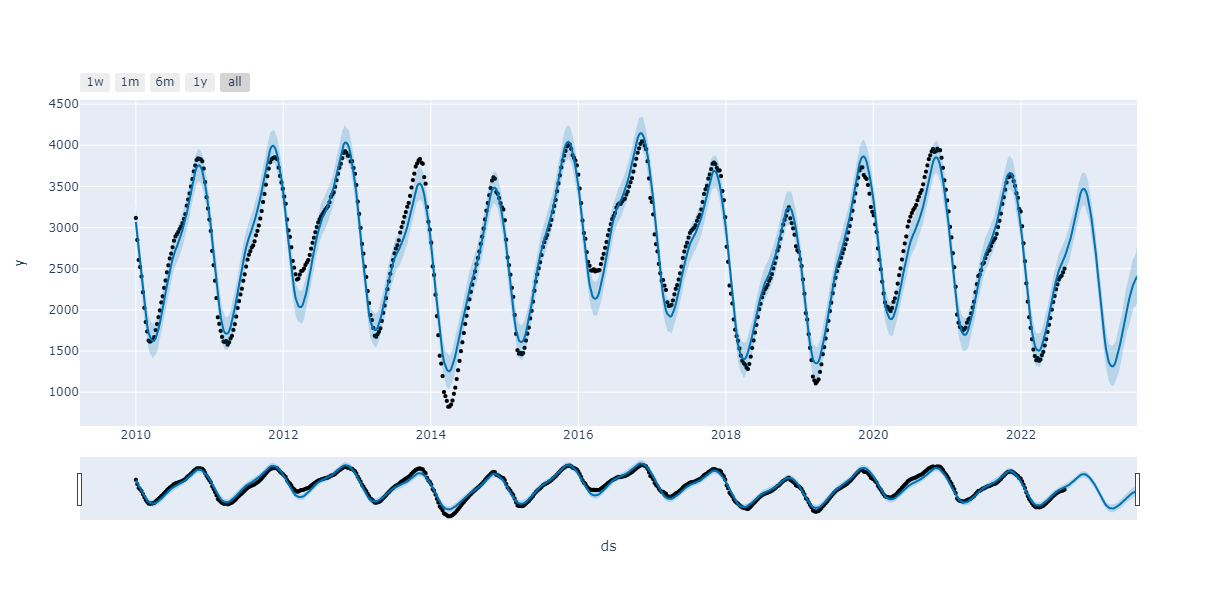

In [50]:
# static plotting
#fig1 = m.plot(forecast)

# interactive plotting
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)

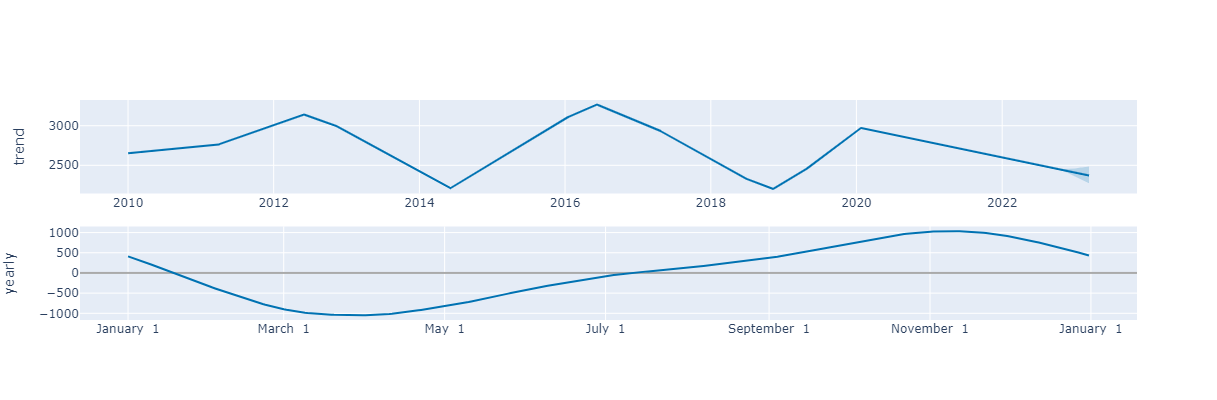

In [43]:
#fig2 = m.plot_components(forecast)

plot_components_plotly(m, forecast)

In [52]:
pred_err = test.merge(forecast[forecast['ds']>='2022-01-01'][['ds','yhat']])
pred_err['pred_error'] = pred_err.y - pred_err.yhat
pred_err

,ds,y,year,month,yhat,pred_error
0,2022-01-07,3016,2022,1,2877.988442,138.011558
1,2022-01-14,2810,2022,1,2700.465521,109.534479
2,2022-01-21,2591,2022,1,2517.937984,73.062016
3,2022-01-28,2323,2022,1,2344.353120,-21.353120
4,2022-02-04,2101,2022,2,2181.791155,-80.791155
5,2022-02-11,1911,2022,2,2024.329162,-113.329162
6,2022-02-18,1782,2022,2,1871.650201,-89.650201
7,2022-02-25,1643,2022,2,1735.696700,-92.696700
8,2022-03-04,1519,2022,3,1631.964559,-112.964559
9,2022-03-11,1440,2022,3,1565.506129,-125.506129


In [53]:
# MAE: 
mae = np.mean(np.abs(pred_err.pred_error))
print(f'MAE: {round(mae,2)}')
# MAPE
mape = np.mean(np.abs(pred_err.pred_error/pred_err.y))*100
print(f'MAPE: {round(mape,2)}%')

MAE: 112.4
MAPE: 6.03%
